# E06: Día en calma promedio para el mes

In [1]:
# importamos las librerías que vamos a necesitar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# nuestra librería
import ist_lib as ist

folder='dst_stations/2015-03/'
month='201503'

# observatorios usados para el índice Dst
obs=['her','hon','kak','sjg']

# días en calma para el mes de marzo de 2015
qs=['10','30','05','14','09']

# variable para guardar todos los datos (1440 minutos) de los cuatro observatorios,
# los días necesarios
dat = np.zeros([len(obs),len(qs),1440])

# leer todos los días en calma del mes para cada observatorio (sólo la componente H (c1))
for o in obs:
    for q in qs:
        filename=folder + o + '/' + o + month + q + 'qmin.min'
        df=ist.read_im(filename=filename)
        data=df['data']
        dat[obs.index(o)][qs.index(q)][:]=data.c1

# Observemos los cinco días en calma superpuestos

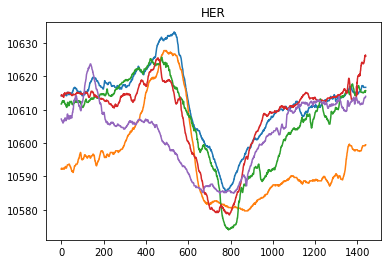

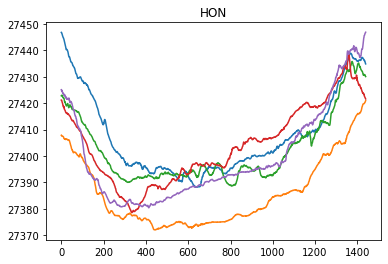

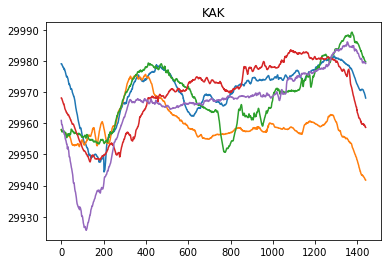

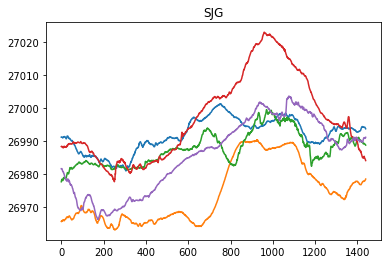

In [2]:
# Días tranquilos del mes para los cuatro observatorios
for io in range(4): # itera entre observatorios
    for i in range(len(qs)): # itera entre días en calma
        plt.plot(dat[io][i][:]);
        plt.title(obs[io].upper())
    plt.show()

## P01: ¿Tiene sentido lo que se está observando?, comenta el resultado

### R01:

# Observemos el día en calma promedio superpuesto

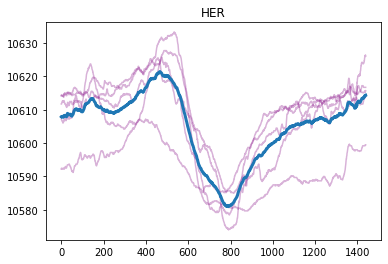

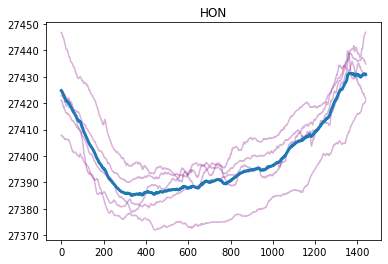

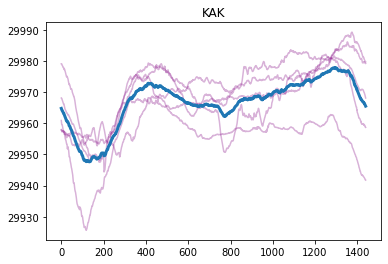

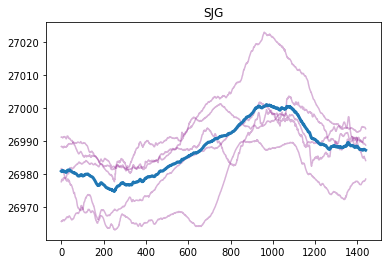

In [3]:
# Creamos el día en calma promedio para cada observatorio
quiets = np.zeros([len(obs),1440])
for io in range(4): # itera entre observatorios
    quiets[io][:]=np.mean(dat[io][:][:],axis=0)
# Mostramos
for io in range(4): # itera entre observatorios
    for i in range(len(qs)): # itera entre días en calma
        plt.plot(dat[io][i][:], color='purple', alpha=0.3);
        plt.title(obs[io].upper())
    plt.plot(quiets[io][:], linewidth=3); # mostramos el día en calma promedio
    plt.show()

## P02: ¿Qué rango en nT, aproximadamente, varían los días en calma respceto del promedio?

### R02:

# Hagamos una replica del día en calma para todo el mes

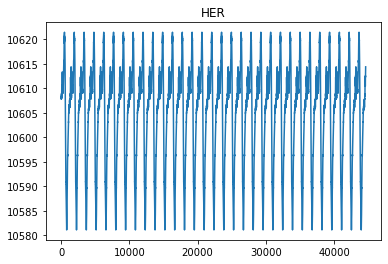

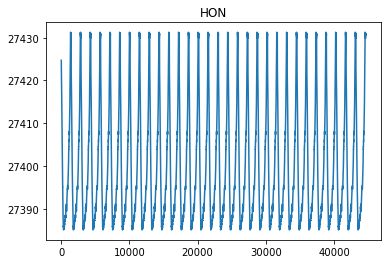

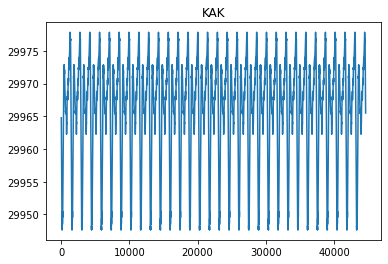

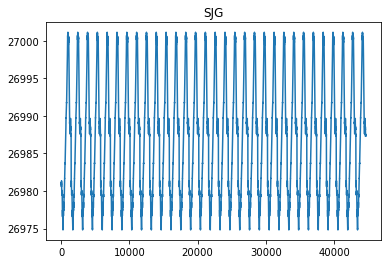

In [4]:
sq = np.zeros([len(obs),31,1440]) # variable que contiene para los cuatro obs, 31 días de 1440 minutos
# Replicamos el día en calma promedio para todo el mes en los cuatro observatorios
for io in range(4):
    for i in range(31):
        sq[io][i][:] = quiets[io][:]

# Mostramos
for io in range(4): # itera entre observatorios
    plt.plot(sq[io][:][:].reshape(-1));
    plt.title(obs[io].upper())
    plt.show()

## P03: ¿Qué rango de valores tiene una variación diara en cada observatorio?

### R03:

# Veamos un zoom (sólo cinco días)

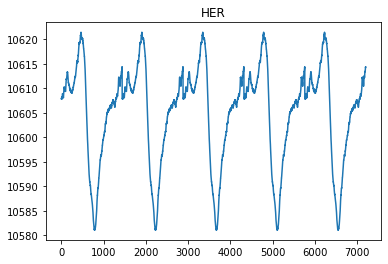

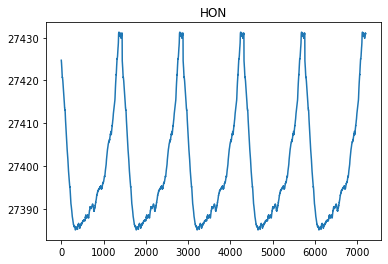

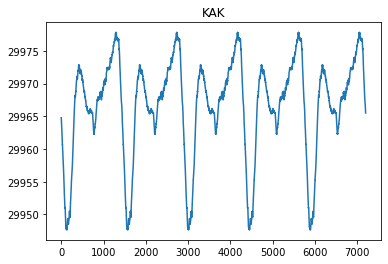

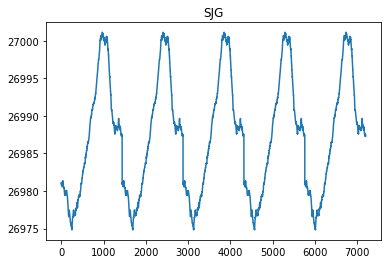

In [5]:
# Mostramos sólo cinco días
for io in range(4): # itera entre observatorios
    plt.plot(sq[io][0:5][:].reshape(-1));
    plt.title(obs[io].upper())
    plt.show()

## A04: Analizando el procedimiento para obtener el mes completo de días en calma, ¿puedes pensar algún inconveniente en el uso de estos datos?

### R04: